In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = make_blobs(1000, n_features=2, centers=[[2,3], [4,5]])
print(X.shape, y.shape)


(1000, 2) (1000,)


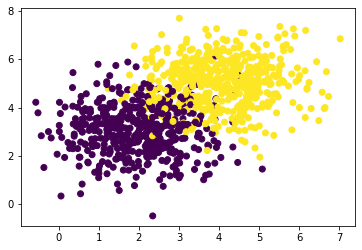

In [5]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [11]:
X0 = X[y==0]
y0 = y[y==0]
print(X0.shape, y0.shape)

X1 = X[y==1][:20]
y1 = y[y==1][:20]
print(X1.shape, y1.shape)

(500, 2) (500,)
(20, 2) (20,)


In [12]:
X_ = np.concatenate([X0,X1], axis=0)
y_ = np.concatenate([y0, y1], axis=0)

print(X_.shape, y_.shape)

(520, 2) (520,)


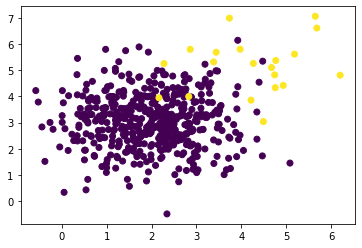

In [13]:
plt.scatter(X_[:,0], X_[:,1], c = y_)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(X_, y_)
ypred = lr.predict(X_)

In [16]:
acc = (ypred == y_).mean()
print(acc)

0.9807692307692307


In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [20]:
precision_score(y_, ypred)

0.8125

In [22]:
recall_score(y_, ypred)

0.65

In [24]:
f1_score(y_, ypred)

0.7222222222222223

In [25]:
confusion_matrix(y_, ypred)

array([[497,   3],
       [  7,  13]], dtype=int64)

In [32]:
print(classification_report(y_, ypred, digits=2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.81      0.65      0.72        20

    accuracy                           0.98       520
   macro avg       0.90      0.82      0.86       520
weighted avg       0.98      0.98      0.98       520



In [42]:
prob = lr.predict_proba(X_)
prob = prob.max(axis=1)
prob.shape

(520,)

In [43]:
threshold = np.arange(0, 1, 0.05)
for th in threshold:
    accuracy = (prob > th).mean()
    print("threshold %.2f, accuracy: %.2f"%(th, accuracy))    


threshold 0.00, accuracy: 1.00
threshold 0.05, accuracy: 1.00
threshold 0.10, accuracy: 1.00
threshold 0.15, accuracy: 1.00
threshold 0.20, accuracy: 1.00
threshold 0.25, accuracy: 1.00
threshold 0.30, accuracy: 1.00
threshold 0.35, accuracy: 1.00
threshold 0.40, accuracy: 1.00
threshold 0.45, accuracy: 1.00
threshold 0.50, accuracy: 1.00
threshold 0.55, accuracy: 1.00
threshold 0.60, accuracy: 0.99
threshold 0.65, accuracy: 0.99
threshold 0.70, accuracy: 0.99
threshold 0.75, accuracy: 0.98
threshold 0.80, accuracy: 0.97
threshold 0.85, accuracy: 0.96
threshold 0.90, accuracy: 0.95
threshold 0.95, accuracy: 0.91


In [37]:
prob.max(axis=1)

array([0.91685922, 0.7304347 , 0.75155071, 0.99873216, 0.99508822,
       0.92183767, 0.96590839, 0.99951338, 0.99651083, 0.98696407,
       0.67538749, 0.99533324, 0.99970786, 0.95999111, 0.6358441 ,
       0.69471342, 0.94963672, 0.67456044, 0.99942243, 0.99947818,
       0.99623694, 0.78077711, 0.99377054, 0.96685638, 0.98919569,
       0.99797173, 0.99991759, 0.98909266, 0.85895452, 0.8764316 ,
       0.99997995, 0.99988458, 0.99433504, 0.77780342, 0.57773363,
       0.99935478, 0.99817108, 0.99058936, 0.50373855, 0.72830235,
       0.5156538 , 0.99962727, 0.94473469, 0.9850089 , 0.99628999,
       0.83645627, 0.83152574, 0.59581518, 0.56431764, 0.99887651,
       0.85822459, 0.99929935, 0.89747368, 0.72081598, 0.99748185,
       0.99936232, 0.99730798, 0.8568061 , 0.90238863, 0.99840419,
       0.93428674, 0.98176607, 0.97116081, 0.99001958, 0.99774067,
       0.99577593, 0.99989618, 0.99899147, 0.99969345, 0.9979564 ,
       0.76761411, 0.96860107, 0.99722625, 0.95330714, 0.97155